**Data Source** 
http://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [ ]:
#    1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
#    2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
#    3. month - month of the year: "jan" to "dec" 
#    4. day - day of the week: "mon" to "sun"
#    5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
#    6. DMC - DMC index from the FWI system: 1.1 to 291.3 
#    7. DC - DC index from the FWI system: 7.9 to 860.6 
#    8. ISI - ISI index from the FWI system: 0.0 to 56.10
#    9. temp - temperature in Celsius degrees: 2.2 to 33.30
#    10. RH - relative humidity in %: 15.0 to 100
#    11. wind - wind speed in km/h: 0.40 to 9.40 
#    12. rain - outside rain in mm/m2 : 0.0 to 6.4 
#    13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
#    (this output variable is very skewed towards 0.0, thus it may make
#     sense to model with the logarithm transform). 

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

--2021-04-16 01:21:31--  http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25478 (25K) [application/x-httpd-php]
Saving to: ‘forestfires.csv’

forestfires.csv     100%[===================>]  24.88K  --.-KB/s    in 0.06s   

2021-04-16 01:21:31 (388 KB/s) - ‘forestfires.csv’ saved [25478/25478]



In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names

--2021-04-16 01:21:47--  http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3420 (3.3K) [application/x-httpd-php]
Saving to: ‘forestfires.names’

forestfires.names   100%[===================>]   3.34K  --.-KB/s    in 0s      

2021-04-16 01:21:47 (591 MB/s) - ‘forestfires.names’ saved [3420/3420]



In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/forestfires.csv')
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# Load data

UCI_dataset = np.loadtxt("forestfires.csv", 
                         dtype= 'str', skiprows=1, delimiter=',')

X = UCI_dataset[:,0:12]
Y = UCI_dataset[:,12]
Y = Y.astype(np.float32)
print("Raw dataset --------------------------------")
print(X[0:5,:],"\n")

integer_mapMonths = {x: i for i,x in enumerate(['jan','feb','mar','apr','may','jun',
                                                'jul','aug','sep','oct','nov','dec'])}
encoded_months = np.asarray([integer_mapMonths[word] for word in X[:,2]])
print(integer_mapMonths)
print(X[0:5,2])
print(encoded_months[0:5],"\n")

integer_mapDays = {x: i for i,x in enumerate(['mon','tue','wed','thu','fri','sat','sun'])}
encoded_days = np.asarray([integer_mapDays[word] for word in X[:,3]])
print(integer_mapDays)
print(X[0:5,3])
print(encoded_days[0:5],"\n")

# Overwrite with encoded data
X[:,2] = encoded_months
X[:,3] = encoded_days
X = X.astype(np.float32)

print("Encoded dataset --------------------------------")
print(X[0:5,:])


Raw dataset --------------------------------
[['7' '5' 'mar' 'fri' '86.2' '26.2' '94.3' '5.1' '8.2' '51' '6.7' '0']
 ['7' '4' 'oct' 'tue' '90.6' '35.4' '669.1' '6.7' '18' '33' '0.9' '0']
 ['7' '4' 'oct' 'sat' '90.6' '43.7' '686.9' '6.7' '14.6' '33' '1.3' '0']
 ['8' '6' 'mar' 'fri' '91.7' '33.3' '77.5' '9' '8.3' '97' '4' '0.2']
 ['8' '6' 'mar' 'sun' '89.3' '51.3' '102.2' '9.6' '11.4' '99' '1.8' '0']] 

{'feb': 1, 'jan': 0, 'dec': 11, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'jul': 6, 'apr': 3, 'jun': 5, 'may': 4, 'mar': 2}
['mar' 'oct' 'oct' 'mar' 'mar']
[2 9 9 2 2] 

{'thu': 3, 'sat': 5, 'mon': 0, 'wed': 2, 'tue': 1, 'fri': 4, 'sun': 6}
['fri' 'tue' 'sat' 'fri' 'sun']
[4 1 5 4 6] 

Encoded dataset --------------------------------
[[7.000e+00 5.000e+00 2.000e+00 4.000e+00 8.620e+01 2.620e+01 9.430e+01
  5.100e+00 8.200e+00 5.100e+01 6.700e+00 0.000e+00]
 [7.000e+00 4.000e+00 9.000e+00 1.000e+00 9.060e+01 3.540e+01 6.691e+02
  6.700e+00 1.800e+01 3.300e+01 9.000e-01 0.000e+00]
 [7.000e+0

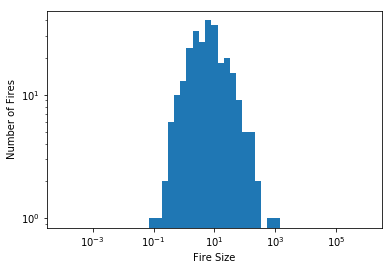

Mean fire size: 12.847291946411133
Median fire size: 0.5199999809265137
Var in fire size: 4044.225341796875


In [ ]:
#Distibution of fire size
plt.hist(Y, bins=np.logspace(-4,6, 50));
plt.ylabel('Number of Fires')
plt.xlabel('Fire Size')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.savefig("UCI_fires_dist_log.png")
plt.show()

print("Mean fire size: {}".format(np.mean(Y)))
print("Median fire size: {}".format(np.median(Y)))
print("Var in fire size: {}".format(np.var(Y)))

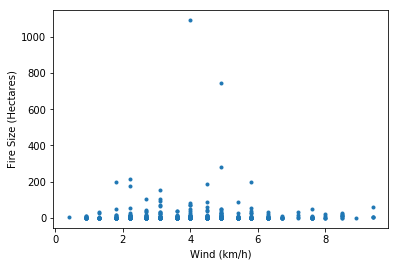

In [ ]:
plt.scatter(X[:,10],Y,marker='.')
#plt.title("Fire size vs Day")
plt.ylabel("Fire Size (Hectares)")
plt.xlabel("Wind (km/h)")
plt.savefig("size_vs_wind_speed.png")
plt.show()

In [ ]:
# Shuffles the data before split
# Train/Test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)
print("# Train: {} , #Test: {}".format(X_train.shape[0], X_test.shape[0]))
print("# inputs: {}".format(X_train.shape[1]))
n = X_train.shape[1]

# Train: 413 , #Test: 104
# inputs: 12


In [ ]:
# Neural network
model = Sequential()
model.add(Dense(32, input_dim=n, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, input_dim=n , activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_15 (Batc (None, 64)                256       
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)              

In [ ]:
model.compile(loss='mape', optimizer='adam', metrics=['mse','mae','mape'])

In [ ]:
#Save partly trained model
#model.save('partly_trained.h5')

#Load partly trained model
#model = load_model('partly_trained.h5')

#Continue training
history = model.fit(X_train, y_train, epochs=500, batch_size=1, verbose = 2, validation_split = 0.2, shuffle=True)

In [ ]:
# SKlearn MLP
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error

NN = MLPRegressor(hidden_layer_sizes=(1500,1500,1200,1000,800,400,200),max_iter=10000, verbose=True)

hist = NN.fit(X_train,y_train.reshape(-1))
y_pred = NN.predict(X_test)

def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / (y_test+10e-1)) ) * 100
print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
print("MAPE: {}".format(mean_absolute_percentage_error(y_test.reshape(-1,1),y_pred.reshape(-1,1))) )
print("---------------------------------------")


Iteration 1, loss = 5854.22106621
Iteration 2, loss = 2465.13517170
Iteration 3, loss = 2600.50722807
Iteration 4, loss = 2423.27326548
Iteration 5, loss = 2427.66464366
Iteration 6, loss = 2489.58346054
Iteration 7, loss = 2524.25472303
Iteration 8, loss = 2425.56058907
Iteration 9, loss = 2418.67123984
Iteration 10, loss = 2425.14606533
Iteration 11, loss = 2421.15752321
Iteration 12, loss = 2466.47361951
Iteration 13, loss = 2441.82952516
Iteration 14, loss = 2465.55271946
Iteration 15, loss = 2460.82036317
Iteration 16, loss = 2430.12291319
Iteration 17, loss = 2427.49190543
Iteration 18, loss = 2494.47956117
Iteration 19, loss = 2471.29735782
Iteration 20, loss = 2428.81065824
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MAE: 10.140522702158952
MAPE: 223.86018957537362
---------------------------------------


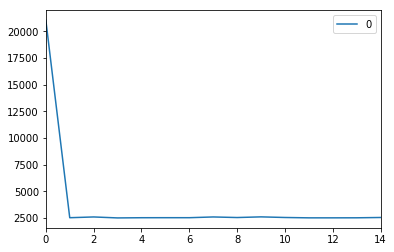

In [ ]:
import pandas as pd
pd.DataFrame(NN.loss_curve_).plot()


[ 0.   37.02 11.22  0.   39.35  0.   14.57  0.    0.   86.45] [8.40347213 3.65560207 8.81655474 5.38101944 8.18770492 6.61313828
 7.8641258  7.39306313 2.11953636 4.94312998]


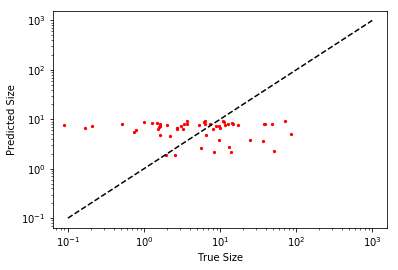

In [ ]:
#Visualize some predictions
print(y_test[0:10],y_pred[0:10])
plt.scatter(y_test, y_pred, s=20, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
plt.savefig("UCI_preds_nn.png")

In [ ]:
# SVM
from sklearn import svm
from sklearn.metrics import r2_score, mean_absolute_error

for k in ['rbf']:
    for d in [3]: #,5,10,20
        svm_reg = svm.SVR(kernel=k, degree=d, gamma='auto')
        svm_reg.fit(X_train,y_train.reshape(-1))

        y_pred = svm_reg.predict(X_test)
        print("K: {}, d: {}".format(k,d))
        print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
        print("MAPE: {}".format(mean_absolute_percentage_error(y_test,y_pred)))
        print("---------------------------------------")


K: rbf, d: 3
MAE: 9.445110912826568
MAPE: 74.98579894665552
---------------------------------------


[ 0.   37.02 11.22  0.   39.35  0.   14.57  0.    0.   86.45] [0.40674712 1.00060731 1.00210703 0.66247885 0.97026893 1.06677108
 0.80855122 1.00063416 0.94708988 1.00060731]


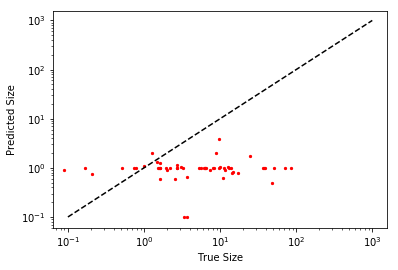

In [ ]:
#Visualize svm predictions
print(y_test[0:10],y_pred[0:10])
plt.scatter(y_test, y_pred, s=20, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
plt.savefig("UCI_preds_svm.png")

Coefficients: [ 2.8721628  -0.3271666   3.6485336   1.0529488   0.02205135  0.10660022
 -0.03611848 -0.9463268   1.024104   -0.29676226  1.560239   -3.3753455 ]
MAPE:  869.1654205322266
MAE:  15.546554


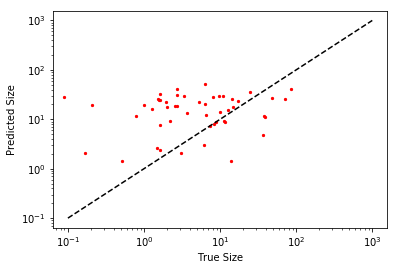

In [ ]:
from sklearn.linear_model import LinearRegression
#Testing on all coefficients
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients:", reg.coef_)
lin_pred = reg.predict(X_test)
#Visualize some predictions
plt.scatter(y_test, lin_pred, s=20, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
plt.savefig("UCI_fire_preds_linereg.png")
print("MAPE: ",mean_absolute_percentage_error(y_test,lin_pred))
print("MAE: ",mean_absolute_error(y_test,lin_pred))

In [ ]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor


for nbs in [40,60,100]:
    for wts in ['distance','uniform']:
        K_nn = KNeighborsRegressor(n_neighbors=nbs,
                                   weights=wts,
                                   n_jobs=6)

        K_nn.fit(X_train,y_train.reshape(-1))
        y_pred = K_nn.predict(X_test)

        print("nbs: {}, wts: {}".format(nbs, wts))
        print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
        print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
        print("r2: {}".format(r2_score(y_test,y_pred)))
        print("---------------------------------------")

nbs: 40, wts: distance
MAE: 15.53613427917074
MAPE:  639.8823197139943
r2: -0.03523109755364073
---------------------------------------
nbs: 40, wts: uniform
MAE: 16.92664909362793
MAPE:  747.0844745635986
r2: -0.09972501270684564
---------------------------------------
nbs: 60, wts: distance
MAE: 15.24128467002468
MAPE:  645.781242921873
r2: -0.009158710913242274
---------------------------------------
nbs: 60, wts: uniform
MAE: 16.25840187072754
MAPE:  732.8303813934326
r2: -0.049341699293121044
---------------------------------------
nbs: 100, wts: distance
MAE: 16.314549232914388
MAPE:  729.2469099123996
r2: -0.018647941352637032
---------------------------------------
nbs: 100, wts: uniform
MAE: 17.649208068847656
MAPE:  842.8913116455078
r2: -0.06123464791167921
---------------------------------------


In [ ]:
# Decision Tree
from sklearn import tree

tree_clf = tree.DecisionTreeRegressor(criterion='mae')

tree_clf.fit(X_train,y_train.reshape(-1))

y_pred = tree_clf.predict(X_test)

print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
print("r2: {}".format(r2_score(y_test,y_pred)))
print("---------------------------------------")


MAE: 31.54014407012325
MAPE:  995.7772467176076
r2: -15.690575075066967
---------------------------------------


In [ ]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor(max_iter=1000000000, tol=1e-3, shuffle=True, verbose=0, learning_rate='adaptive'
                  ,warm_start=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
print("r2: {}".format(r2_score(y_test,y_pred)))
print("---------------------------------------")

MAE: 9661891965726.898
MAPE:  544464951340132.25
r2: -1.6648129454053907e+23
---------------------------------------


In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0, alpha=1).fit(X_train, y_train)
print('gpr score: ', gpr.score(X_train,y_train))
y_pred = gpr.predict(X_test, return_std=True)[0]

print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
print("r2: {}".format(r2_score(y_test,y_pred)))
print("---------------------------------------")

gpr score:  0.018292274047403856
MAE: 15.69200609081733
MAPE:  710.6856257215844
r2: 0.004389910964204491
---------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(min_weight_fraction_leaf=0.0095,random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
print("r2: {}".format(r2_score(y_test,y_pred)))
print("---------------------------------------")

MAE: 16.165932773663265
MAPE:  621.447829299567
r2: -0.04227208329518173
---------------------------------------


/home/ben/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=0, n_estimators=4)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
print("r2: {}".format(r2_score(y_test,y_pred)))
print("---------------------------------------")

MAE: 12.051794783331644
MAPE:  240.38153425421575
r2: -0.21838981198714924
---------------------------------------


In [ ]:
# Stacked regressors
from mlxtend.regressor import StackingRegressor

n = 10000

estimators = [K_nn, NN, svm_reg]

regStack = StackingRegressor(regressors=estimators,
                             meta_regressor=NN)

regStack.fit(X_train,y_train.reshape(-1))

y_pred = regStack.predict(X_test)

print("MAE: {}".format(mean_absolute_error(y_test,y_pred)))
print("MAPE: ",mean_absolute_percentage_error(y_test,y_pred))
print("r2: {}".format(r2_score(y_test,y_pred)))
print("---------------------------------------")


Iteration 1, loss = 8659.61225903
Iteration 2, loss = 2768.03990390
Iteration 3, loss = 2440.49040669
Iteration 4, loss = 2571.07314001
Iteration 5, loss = 2427.27445149
Iteration 6, loss = 2512.39631414
Iteration 7, loss = 2454.78204035
Iteration 8, loss = 2447.71394202
Iteration 9, loss = 2430.43218818
Iteration 10, loss = 2441.63334379
Iteration 11, loss = 2421.30230274
Iteration 12, loss = 2421.44744580
Iteration 13, loss = 2426.71775562
Iteration 14, loss = 2435.11174650
Iteration 15, loss = 2432.45778397
Iteration 16, loss = 2439.77775412
Iteration 17, loss = 2503.50859276
Iteration 18, loss = 2415.44515983
Iteration 19, loss = 2480.12926617
Iteration 20, loss = 2489.08893042
Iteration 21, loss = 2470.97265045
Iteration 22, loss = 2441.41171470
Iteration 23, loss = 2421.44480119
Iteration 24, loss = 2424.79539683
Iteration 25, loss = 2423.37531615
Iteration 26, loss = 2422.29429990
Iteration 27, loss = 2434.70675052
Iteration 28, loss = 2425.39092891
Iteration 29, loss = 2438.720

In [ ]:
#Best Features - Univariate statistical selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd

#apply SelectKBest class to extract top 10 best features
feature_names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain,area']
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,np.array(Y).astype(int))
dfscores = pd.DataFrame(fit.scores_)
df_specs = pd.Series(feature_names).astype(str)
#concat two dataframes for better visualization 
featureScores = pd.concat([df_specs,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

      Feature        Score
6          DC  5519.304833
5         DMC  2354.024527
9          RH   385.465278
11  rain,area   230.570186
7         ISI   141.603497
8        temp   134.638930
3         day    95.625045
0           X    65.588459
10       wind    57.498710
2       month    43.820284
1           Y    22.311578
4        FFMC    11.179402


/home/ben/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


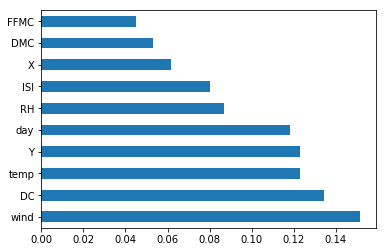

In [ ]:
#Best Features - importance
# Feature importance gives you a score for each feature of your data, the higher the score more 
# important or relevant is the feature towards your output variable.
# Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using 
# Extra Tree Classifier for extracting the top 10 features for the dataset.

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

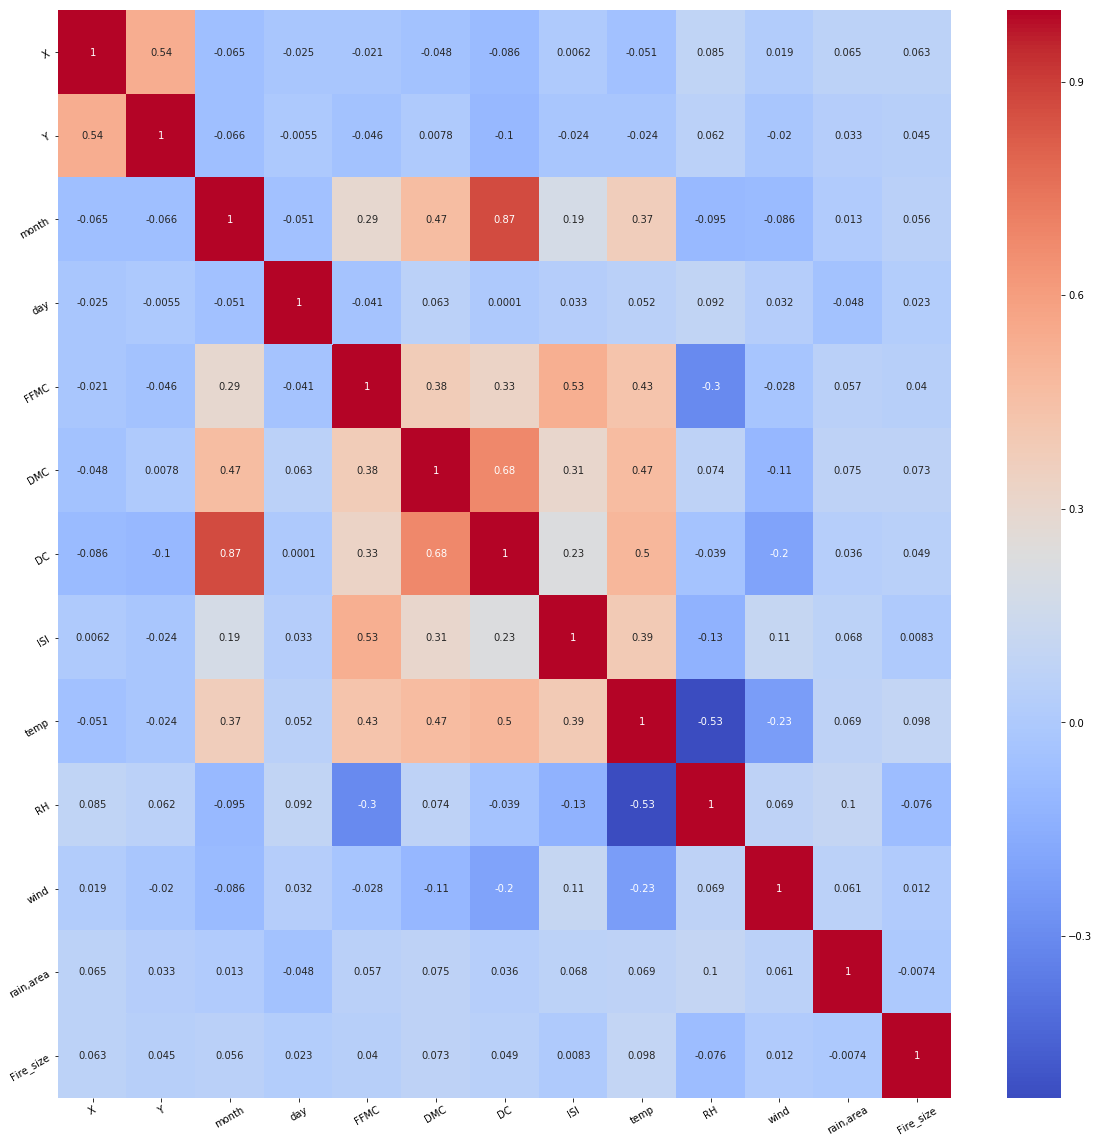

In [ ]:
# Best feautres - correlation heatmap
import seaborn as sns
feature_names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain,area','Fire_size']
data = np.concatenate((X,Y.reshape(-1,1)),axis=1)
corrmat = np.corrcoef(data.T)
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True,cmap="coolwarm")
g.set_xticklabels(feature_names,rotation=30)
g.set_yticklabels(feature_names,rotation=30)
plt.savefig('corr_UCI.png')
plt.show()


In [ ]:
# PCA
from sklearn.decomposition import PCA
X_scaled = StandardScaler().fit_transform(X)

pca=PCA(n_components=4) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
print(X_scaled.shape)
print(X_pca.shape)

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


(517, 12)
(517, 4)
[0.4393419  0.20718996 0.19046578 0.16300234]


/home/ben/.local/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


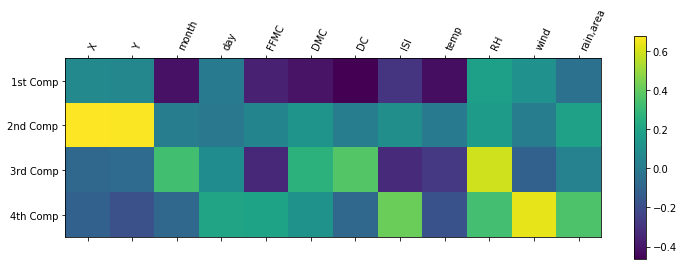

In [ ]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['1st Comp','2nd Comp','3rd Comp','4th Comp'],fontsize=10)
plt.colorbar()
feature_names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain,area']
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 